In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import torch
import numpy as np
from torch.utils.data import DataLoader

from model import MixingModel
from dataset import AudioMixingDataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
d = AudioMixingDataset('/media/apelykh/bottomless-pit/datasets/mixing/MUSDB18HQ/test',
                       chunk_length=5, train_val_test_split=(0.0, 0.0, 1.0),
                       mode='test', seed=123)
print(len(d))

2473


Song index:  19
[-] Unloading track 22
[+] Loading track 19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Num free chunks:  50
Chunk index:  29
(5, 128, 216)
(128, 216)


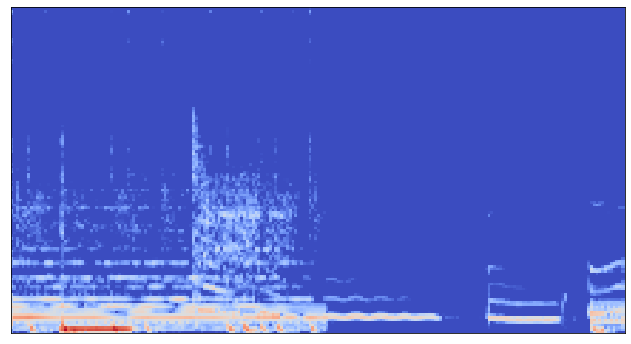

In [21]:
plt.figure(figsize=(11,6))

sample = d[945]
# ipd.Audio(d[1103]['drums_audio'], rate=44100)
print(sample['train_features'].shape)
print(sample['gt_features'].shape)
librosa.display.specshow(sample['gt_features'])
# print(d[1004]['mixture_feature'])

In [31]:
model = MixingModel()
out = model.forward(torch.Tensor(sample['train_features'][np.newaxis, :]))

print(out[0].shape)
print(out[1])

torch.Size([1, 8, 64, 216])
torch.Size([1, 16, 32, 216])
torch.Size([1, 32, 16, 216])
torch.Size([1, 64, 8, 216])
torch.Size([1, 128, 4, 216])
torch.Size([1, 128, 1, 107])
torch.Size([1, 128, 107])
torch.Size([1, 107])
tensor([[-0.0669, -0.1077, -0.1321, -0.1331, -0.1379, -0.1367, -0.1453, -0.1312,
         -0.1323, -0.1377, -0.1292, -0.1455, -0.1466, -0.1460, -0.1350, -0.1480,
         -0.1313, -0.1491, -0.1454, -0.1475, -0.1387, -0.1460, -0.1397, -0.1458,
         -0.1336, -0.1444, -0.1442, -0.1466, -0.1348, -0.1462, -0.1246, -0.1291,
         -0.1250, -0.1313, -0.1345, -0.1123, -0.1271, -0.1062, -0.1187, -0.1034,
         -0.1180, -0.1290, -0.1156, -0.1167, -0.1404, -0.1435, -0.1326, -0.1264,
         -0.1275, -0.1407, -0.1477, -0.1333, -0.1448, -0.1333, -0.1243, -0.1270,
         -0.1348, -0.1456, -0.1436, -0.1437, -0.1433, -0.1428, -0.1420, -0.1424,
         -0.1374, -0.1373, -0.1407, -0.1421, -0.1386, -0.1376, -0.1349, -0.1361,
         -0.1364, -0.1333, -0.1330, -0.1340, -0.1327

In [32]:
num_trainable_param = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('{} trainable parameters'.format(num_trainable_param))

248037 trainable parameters


In [24]:
for i in range(len(d)):
    print('CHUNK: {}'.format(i))
    print('---------------')
    sample = d[i]
    if i == 20:
#         print(sample['drums_feature'].shape)
#         librosa.display.specshow(sample['mixture_feature'])
        ipd.Audio(sample['drums_audio'], rate=44100)
        print('---------------')
        break

CHUNK: 0
---------------
Song index:  0
[5 8 9]
Num free chunks:  3
Chunk index:  8
CHUNK: 1
---------------
Song index:  0
[5 9]
Num free chunks:  2
Chunk index:  5
CHUNK: 2
---------------
Song index:  0
[9]
Num free chunks:  1
Chunk index:  9
[-] Unloading track 0
CHUNK: 3
---------------
Song index:  0
[-] Unloading track None
[+] Loading track 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Num free chunks:  33
Chunk index:  9
CHUNK: 4
---------------
Song index:  0
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
Num free chunks:  32
Chunk index:  8
CHUNK: 5
---------------
Song index:  0
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32]
Num free chunks:  31
Chunk index:  21
CHUNK: 6
---------------
Song index:  0
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 27 28 29 30 31 32]
Num free chunks:  30
Chun

In [5]:
train_loader = DataLoader(d, batch_size=32, shuffle=False,
           num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)

In [6]:
import time

start = time.time()
for batch in train_loader:
    print(batch['chunk_index'])

end = time.time()
print('-' * 60)
print('Time elapsed: ', end - start)

Song index:  0
[-] Unloading track None
[+] Loading track 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Num free chunks:  33
Chunk index:  5
Song index:  0
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
Num free chunks:  32
Chunk index:  8
Song index:  0
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32]
Num free chunks:  31
Chunk index:  31
Song index:  0
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 32]
Num free chunks:  30
Chunk index:  22
Song index:  0
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29 30 32]
Num free chunks:  29
Chunk index:  18
Song index:  0
[ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 19 20 21 23 24 25 26 27
 28 29 30 32]
Num free chunks:  28
Chunk index:  14
Song index:  0
[ 0  1  2  3  4  6  7  9 10 11 12 13 15 16 17 19 20 21 23

Song index:  3
[ 1  3  5  6  7  8 10 11 12 15 16 19 20 22 23 25 26 27 28 30 32 33 34 35
 36 37 38 39 40 42]
Num free chunks:  30
Chunk index:  27
Song index:  3
[ 1  3  5  6  7  8 10 11 12 15 16 19 20 22 23 25 26 28 30 32 33 34 35 36
 37 38 39 40 42]
Num free chunks:  29
Chunk index:  11
Song index:  3
[ 1  3  5  6  7  8 10 12 15 16 19 20 22 23 25 26 28 30 32 33 34 35 36 37
 38 39 40 42]
Num free chunks:  28
Chunk index:  32
Song index:  3
[ 1  3  5  6  7  8 10 12 15 16 19 20 22 23 25 26 28 30 33 34 35 36 37 38
 39 40 42]
Num free chunks:  27
Chunk index:  25
Song index:  3
[ 1  3  5  6  7  8 10 12 15 16 19 20 22 23 26 28 30 33 34 35 36 37 38 39
 40 42]
Num free chunks:  26
Chunk index:  22
Song index:  3
[ 1  3  5  6  7  8 10 12 15 16 19 20 23 26 28 30 33 34 35 36 37 38 39 40
 42]
Num free chunks:  25
Chunk index:  7
Song index:  3
[ 1  3  5  6  8 10 12 15 16 19 20 23 26 28 30 33 34 35 36 37 38 39 40 42]
Num free chunks:  24
Chunk index:  26
Song index:  3
[ 1  3  5  6  8 10 12 15 16 

Song index:  4
[ 4  8 15 21 27 28 34 35 43]
Num free chunks:  9
Chunk index:  28
Song index:  4
[ 4  8 15 21 27 34 35 43]
Num free chunks:  8
Chunk index:  8
Song index:  4
[ 4 15 21 27 34 35 43]
Num free chunks:  7
Chunk index:  21
Song index:  4
[ 4 15 27 34 35 43]
Num free chunks:  6
Chunk index:  4
Song index:  4
[15 27 34 35 43]
Num free chunks:  5
Chunk index:  35
Song index:  4
[15 27 34 43]
Num free chunks:  4
Chunk index:  43
Song index:  4
[15 27 34]
Num free chunks:  3
Chunk index:  34
Song index:  4
[15 27]
Num free chunks:  2
Chunk index:  27
Song index:  4
[15]
Num free chunks:  1
Chunk index:  15
[-] Unloading track 4
Song index:  5
[-] Unloading track None
[+] Loading track 5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Num free chunks:  47
Chunk index:  16
Song index:  5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 3

Song index:  6
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27
 28 29 30 31 33 34 35 37 41]
Num free chunks:  33
Chunk index:  11
Song index:  6
[ 0  1  2  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 28
 29 30 31 33 34 35 37 41]
Num free chunks:  32
Chunk index:  34
Song index:  6
[ 0  1  2  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 28
 29 30 31 33 35 37 41]
Num free chunks:  31
Chunk index:  1
Song index:  6
[ 0  2  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 28 29
 30 31 33 35 37 41]
Num free chunks:  30
Chunk index:  35
Song index:  6
[ 0  2  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 28 29
 30 31 33 37 41]
Num free chunks:  29
Chunk index:  28
Song index:  6
[ 0  2  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 29 30
 31 33 37 41]
Num free chunks:  28
Chunk index:  41
Song index:  6
[ 0  2  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 29 30
 31 33 37]
Num free chunks: 

Song index:  8
[ 2  3  4  8  9 10 12 15 16 17 19 20 24 26 28 31 32 33 34 36 37 38 39 41
 42 43 44 46 48 49 51 53 55]
Num free chunks:  33
Chunk index:  3
Song index:  8
[ 2  4  8  9 10 12 15 16 17 19 20 24 26 28 31 32 33 34 36 37 38 39 41 42
 43 44 46 48 49 51 53 55]
Num free chunks:  32
Chunk index:  34
Song index:  8
[ 2  4  8  9 10 12 15 16 17 19 20 24 26 28 31 32 33 36 37 38 39 41 42 43
 44 46 48 49 51 53 55]
Num free chunks:  31
Chunk index:  20
Song index:  8
[ 2  4  8  9 10 12 15 16 17 19 24 26 28 31 32 33 36 37 38 39 41 42 43 44
 46 48 49 51 53 55]
Num free chunks:  30
Chunk index:  12
Song index:  8
[ 2  4  8  9 10 15 16 17 19 24 26 28 31 32 33 36 37 38 39 41 42 43 44 46
 48 49 51 53 55]
Num free chunks:  29
Chunk index:  36
Song index:  8
[ 2  4  8  9 10 15 16 17 19 24 26 28 31 32 33 37 38 39 41 42 43 44 46 48
 49 51 53 55]
Num free chunks:  28
Chunk index:  37
Song index:  8
[ 2  4  8  9 10 15 16 17 19 24 26 28 31 32 33 38 39 41 42 43 44 46 48 49
 51 53 55]
Num free chunks: 

Song index:  9
[ 0  1  2  3  4  5  6  7 10 11 12 13 15 17 18 19 20 22 23 24 25 27 29 30
 32 34 35 36 37 39 41 49 50 52 54 55 56 60 61 62 63]
Num free chunks:  41
Chunk index:  11
Song index:  9
[ 0  1  2  3  4  5  6  7 10 12 13 15 17 18 19 20 22 23 24 25 27 29 30 32
 34 35 36 37 39 41 49 50 52 54 55 56 60 61 62 63]
Num free chunks:  40
Chunk index:  4
Song index:  9
[ 0  1  2  3  5  6  7 10 12 13 15 17 18 19 20 22 23 24 25 27 29 30 32 34
 35 36 37 39 41 49 50 52 54 55 56 60 61 62 63]
Num free chunks:  39
Chunk index:  10
Song index:  9
[ 0  1  2  3  5  6  7 12 13 15 17 18 19 20 22 23 24 25 27 29 30 32 34 35
 36 37 39 41 49 50 52 54 55 56 60 61 62 63]
Num free chunks:  38
Chunk index:  63
Song index:  9
[ 0  1  2  3  5  6  7 12 13 15 17 18 19 20 22 23 24 25 27 29 30 32 34 35
 36 37 39 41 49 50 52 54 55 56 60 61 62]
Num free chunks:  37
Chunk index:  18
Song index:  9
[ 0  1  2  3  5  6  7 12 13 15 17 19 20 22 23 24 25 27 29 30 32 34 35 36
 37 39 41 49 50 52 54 55 56 60 61 62]
Num free c

Song index:  10
[ 1  2  3  4  5  6  7  9 10 12 13 14 15 16 18 20 21 22 24 25 28 30 31 33
 34 35 36 37 38 39 40 41 42 44 45 47 48 49 50 53 55 56 57]
Num free chunks:  43
Chunk index:  18
Song index:  10
[ 1  2  3  4  5  6  7  9 10 12 13 14 15 16 20 21 22 24 25 28 30 31 33 34
 35 36 37 38 39 40 41 42 44 45 47 48 49 50 53 55 56 57]
Num free chunks:  42
Chunk index:  28
Song index:  10
[ 1  2  3  4  5  6  7  9 10 12 13 14 15 16 20 21 22 24 25 30 31 33 34 35
 36 37 38 39 40 41 42 44 45 47 48 49 50 53 55 56 57]
Num free chunks:  41
Chunk index:  44
Song index:  10
[ 1  2  3  4  5  6  7  9 10 12 13 14 15 16 20 21 22 24 25 30 31 33 34 35
 36 37 38 39 40 41 42 45 47 48 49 50 53 55 56 57]
Num free chunks:  40
Chunk index:  30
Song index:  10
[ 1  2  3  4  5  6  7  9 10 12 13 14 15 16 20 21 22 24 25 31 33 34 35 36
 37 38 39 40 41 42 45 47 48 49 50 53 55 56 57]
Num free chunks:  39
Chunk index:  53
Song index:  10
[ 1  2  3  4  5  6  7  9 10 12 13 14 15 16 20 21 22 24 25 31 33 34 35 36
 37 38 39 4

Song index:  11
[ 2  3  4  5  6  7  8 11 12 13 15 17 18 20 22 23 24 25 26 27 28 30 32 33
 34 35 38 39 44]
Num free chunks:  29
Chunk index:  35
Song index:  11
[ 2  3  4  5  6  7  8 11 12 13 15 17 18 20 22 23 24 25 26 27 28 30 32 33
 34 38 39 44]
Num free chunks:  28
Chunk index:  3
Song index:  11
[ 2  4  5  6  7  8 11 12 13 15 17 18 20 22 23 24 25 26 27 28 30 32 33 34
 38 39 44]
Num free chunks:  27
Chunk index:  26
Song index:  11
[ 2  4  5  6  7  8 11 12 13 15 17 18 20 22 23 24 25 27 28 30 32 33 34 38
 39 44]
Num free chunks:  26
Chunk index:  24
Song index:  11
[ 2  4  5  6  7  8 11 12 13 15 17 18 20 22 23 25 27 28 30 32 33 34 38 39
 44]
Num free chunks:  25
Chunk index:  12
Song index:  11
[ 2  4  5  6  7  8 11 13 15 17 18 20 22 23 25 27 28 30 32 33 34 38 39 44]
Num free chunks:  24
Chunk index:  18
Song index:  11
[ 2  4  5  6  7  8 11 13 15 17 20 22 23 25 27 28 30 32 33 34 38 39 44]
Num free chunks:  23
Chunk index:  23
Song index:  11
[ 2  4  5  6  7  8 11 13 15 17 20 22 25 27

Song index:  13
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 27 29 30 32 33 34 35 36 37 38 39 40]
Num free chunks:  37
Chunk index:  7
Song index:  13
[ 0  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26
 27 29 30 32 33 34 35 36 37 38 39 40]
Num free chunks:  36
Chunk index:  34
Song index:  13
[ 0  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26
 27 29 30 32 33 35 36 37 38 39 40]
Num free chunks:  35
Chunk index:  25
tensor([23, 28, 12,  1, 25, 21, 11,  0,  2, 27,  3, 32, 31, 30,  6, 35,  7, 26,
        17,  9, 14, 10, 20, 13, 29, 17, 31, 28,  1,  7, 34, 25])
Song index:  13
[ 0  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27
 29 30 32 33 35 36 37 38 39 40]
Num free chunks:  34
Chunk index:  26
Song index:  13
[ 0  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 27 29
 30 32 33 35 36 37 38 39 40]
Num free chunks:  33
Chunk index:  23
Song index:  13
[ 0  2  3  4  5  6  8  9 10 11

Song index:  14
[22 25 28]
Num free chunks:  3
Chunk index:  28
Song index:  14
[22 25]
Num free chunks:  2
Chunk index:  22
Song index:  14
[25]
Num free chunks:  1
Chunk index:  25
[-] Unloading track 14
Song index:  15
[-] Unloading track None
[+] Loading track 15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Num free chunks:  40
Chunk index:  13
Song index:  15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Num free chunks:  39
Chunk index:  38
Song index:  15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 39]
Num free chunks:  38
Chunk index:  34
Song index:  15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 35 36 37 39]
Num free chunks:  37
Chunk index:  33
Song index:  15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14

Song index:  16
[ 0  2  3  4  5  7  8  9 10 11 12 13 14 15 18 20 21 22 23 24 25 26 27 28
 29 30 31 33 35 37 38 39 40 41 43 44 45 47 48 49 52 53 54 55 56 58]
Num free chunks:  46
Chunk index:  49
Song index:  16
[ 0  2  3  4  5  7  8  9 10 11 12 13 14 15 18 20 21 22 23 24 25 26 27 28
 29 30 31 33 35 37 38 39 40 41 43 44 45 47 48 52 53 54 55 56 58]
Num free chunks:  45
Chunk index:  11
Song index:  16
[ 0  2  3  4  5  7  8  9 10 12 13 14 15 18 20 21 22 23 24 25 26 27 28 29
 30 31 33 35 37 38 39 40 41 43 44 45 47 48 52 53 54 55 56 58]
Num free chunks:  44
Chunk index:  47
Song index:  16
[ 0  2  3  4  5  7  8  9 10 12 13 14 15 18 20 21 22 23 24 25 26 27 28 29
 30 31 33 35 37 38 39 40 41 43 44 45 48 52 53 54 55 56 58]
Num free chunks:  43
Chunk index:  28
Song index:  16
[ 0  2  3  4  5  7  8  9 10 12 13 14 15 18 20 21 22 23 24 25 26 27 29 30
 31 33 35 37 38 39 40 41 43 44 45 48 52 53 54 55 56 58]
Num free chunks:  42
Chunk index:  3
tensor([14, 15, 39, 30, 35,  8, 24, 21,  2, 19, 20,  1, 

Song index:  17
[ 1  5  6  7  8  9 11 13 14 17 19 22 23 24 27 28 29 30 31 32 34 35 37 38]
Num free chunks:  24
Chunk index:  32
Song index:  17
[ 1  5  6  7  8  9 11 13 14 17 19 22 23 24 27 28 29 30 31 34 35 37 38]
Num free chunks:  23
Chunk index:  29
Song index:  17
[ 1  5  6  7  8  9 11 13 14 17 19 22 23 24 27 28 30 31 34 35 37 38]
Num free chunks:  22
Chunk index:  30
Song index:  17
[ 1  5  6  7  8  9 11 13 14 17 19 22 23 24 27 28 31 34 35 37 38]
Num free chunks:  21
Chunk index:  17
Song index:  17
[ 1  5  6  7  8  9 11 13 14 19 22 23 24 27 28 31 34 35 37 38]
Num free chunks:  20
Chunk index:  31
Song index:  17
[ 1  5  6  7  8  9 11 13 14 19 22 23 24 27 28 34 35 37 38]
Num free chunks:  19
Chunk index:  37
Song index:  17
[ 1  5  6  7  8  9 11 13 14 19 22 23 24 27 28 34 35 38]
Num free chunks:  18
Chunk index:  13
tensor([44, 15, 43, 27, 30, 10, 29, 41, 12, 26, 12,  3,  2, 10, 39, 21, 36,  4,
        16, 25, 15, 33,  0, 20, 18, 32, 29, 30, 17, 31, 37, 13])
Song index:  17
[ 1  5

[-] Unloading track 18
Song index:  19
[-] Unloading track None
[+] Loading track 19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Num free chunks:  39
Chunk index:  23
tensor([36, 45, 23,  7, 27,  4, 19, 40,  0, 16,  6, 44, 42, 13, 22, 38,  5, 34,
        20, 10, 35, 31, 24, 33, 41, 29, 32, 14,  1,  2, 28, 23])
Song index:  19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Num free chunks:  38
Chunk index:  6
Song index:  19
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38]
Num free chunks:  37
Chunk index:  32
Song index:  19
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29 30 31 33 34 35 36 37 38]
Num free chunks:  36
Chunk index:  13
Song index:  19
[ 0  1  2  3  4  5  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 24 25 26
 27 28 29 30 31 33 3

Song index:  20
[ 1  8 10 14 17 19 21 23 26 28 31 32 33 34 35 36]
Num free chunks:  16
Chunk index:  21
tensor([36, 38, 30,  7, 11, 12,  9,  2, 39, 37, 30, 16, 29,  5, 18, 13,  0, 40,
         4,  6, 20, 15, 11, 25, 24, 12, 38,  7,  3, 27, 22, 21])
Song index:  20
[ 1  8 10 14 17 19 23 26 28 31 32 33 34 35 36]
Num free chunks:  15
Chunk index:  8
Song index:  20
[ 1 10 14 17 19 23 26 28 31 32 33 34 35 36]
Num free chunks:  14
Chunk index:  33
Song index:  20
[ 1 10 14 17 19 23 26 28 31 32 34 35 36]
Num free chunks:  13
Chunk index:  28
Song index:  20
[ 1 10 14 17 19 23 26 31 32 34 35 36]
Num free chunks:  12
Chunk index:  1
Song index:  20
[10 14 17 19 23 26 31 32 34 35 36]
Num free chunks:  11
Chunk index:  14
Song index:  20
[10 17 19 23 26 31 32 34 35 36]
Num free chunks:  10
Chunk index:  10
Song index:  20
[17 19 23 26 31 32 34 35 36]
Num free chunks:  9
Chunk index:  19
Song index:  20
[17 23 26 31 32 34 35 36]
Num free chunks:  8
Chunk index:  35
Song index:  20
[17 23 26 31 32

Song index:  21
[ 0 23 26 36 45]
Num free chunks:  5
Chunk index:  36
Song index:  21
[ 0 23 26 45]
Num free chunks:  4
Chunk index:  0
tensor([ 8, 19, 43,  4,  7,  9, 20, 42, 35, 16, 29, 15,  1, 14, 40, 28, 44, 46,
        18, 24, 21, 11, 37, 38,  6, 39, 25, 50,  3, 49, 36,  0])
Song index:  21
[23 26 45]
Num free chunks:  3
Chunk index:  23
Song index:  21
[26 45]
Num free chunks:  2
Chunk index:  45
Song index:  21
[26]
Num free chunks:  1
Chunk index:  26
[-] Unloading track 21
Song index:  22
[-] Unloading track None
[+] Loading track 22
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Num free chunks:  47
Chunk index:  36
Song index:  22
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46]
Num free chunks:  46
Chunk index:  30
Song index:  22
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 

tensor([24, 25, 20, 26, 19, 21, 23, 15, 41, 29, 43, 14,  8, 16, 44, 46, 32, 22,
        15, 18, 30, 29, 23, 31, 19, 20, 17, 32,  4, 27,  7, 22])
Song index:  23
[ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 21 24 25 26 28]
Num free chunks:  19
Chunk index:  14
Song index:  23
[ 0  1  2  3  5  6  8  9 10 11 12 13 16 21 24 25 26 28]
Num free chunks:  18
Chunk index:  12
Song index:  23
[ 0  1  2  3  5  6  8  9 10 11 13 16 21 24 25 26 28]
Num free chunks:  17
Chunk index:  8
Song index:  23
[ 0  1  2  3  5  6  9 10 11 13 16 21 24 25 26 28]
Num free chunks:  16
Chunk index:  13
Song index:  23
[ 0  1  2  3  5  6  9 10 11 16 21 24 25 26 28]
Num free chunks:  15
Chunk index:  28
Song index:  23
[ 0  1  2  3  5  6  9 10 11 16 21 24 25 26]
Num free chunks:  14
Chunk index:  10
Song index:  23
[ 0  1  2  3  5  6  9 11 16 21 24 25 26]
Num free chunks:  13
Chunk index:  0
Song index:  23
[ 1  2  3  5  6  9 11 16 21 24 25 26]
Num free chunks:  12
Chunk index:  1
Song index:  23
[ 2  3  5  6  9 11 16 

Song index:  25
[ 0  1  2  3  4  7  8  9 10 11 12 13 14 16 18 19 20 21 22 25 26 27 28 29
 30 31 32 33 34 35 37 38 39 40 41 43 44 45 46 50 51 53 54 55 56 57 59 60
 62 64 65 66 67 68 69 70]
Num free chunks:  56
Chunk index:  69
tensor([ 6, 27, 18, 24, 19, 20,  1, 11, 23, 16,  3, 14,  0,  2, 21, 26, 58, 61,
        47, 23, 24, 42,  6, 17,  5, 63, 52, 15, 48, 49, 36, 69])
Song index:  25
[ 0  1  2  3  4  7  8  9 10 11 12 13 14 16 18 19 20 21 22 25 26 27 28 29
 30 31 32 33 34 35 37 38 39 40 41 43 44 45 46 50 51 53 54 55 56 57 59 60
 62 64 65 66 67 68 70]
Num free chunks:  55
Chunk index:  16
Song index:  25
[ 0  1  2  3  4  7  8  9 10 11 12 13 14 18 19 20 21 22 25 26 27 28 29 30
 31 32 33 34 35 37 38 39 40 41 43 44 45 46 50 51 53 54 55 56 57 59 60 62
 64 65 66 67 68 70]
Num free chunks:  54
Chunk index:  1
Song index:  25
[ 0  2  3  4  7  8  9 10 11 12 13 14 18 19 20 21 22 25 26 27 28 29 30 31
 32 33 34 35 37 38 39 40 41 43 44 45 46 50 51 53 54 55 56 57 59 60 62 64
 65 66 67 68 70]
Num free

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
Num free chunks:  51
Chunk index:  46
Song index:  26
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50]
Num free chunks:  50
Chunk index:  33
Song index:  26
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49
 50]
Num free chunks:  49
Chunk index:  38
Song index:  26
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 39 40 41 42 43 44 45 47 48 49 50]
Num free chunks:  48
Chunk index:  5
Song index:  26
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 39 40 41 42 43 44 45 47 48 49 50]
Num free chunks:  47
Chunk index

Song index:  27
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 17 18 19 21 22 23 24 25 26
 27 28 29 30 31 33 34 35 36 38 39 40 41 42 44 45 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78]
Num free chunks:  71
Chunk index:  5
Song index:  27
[ 0  1  2  3  4  6  7  8  9 11 12 13 14 15 17 18 19 21 22 23 24 25 26 27
 28 29 30 31 33 34 35 36 38 39 40 41 42 44 45 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78]
Num free chunks:  70
Chunk index:  75
Song index:  27
[ 0  1  2  3  4  6  7  8  9 11 12 13 14 15 17 18 19 21 22 23 24 25 26 27
 28 29 30 31 33 34 35 36 38 39 40 41 42 44 45 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72 73 74 76 77 78]
Num free chunks:  69
Chunk index:  12
Song index:  27
[ 0  1  2  3  4  6  7  8  9 11 13 14 15 17 18 19 21 22 23 24 25 26 27 28
 29 30 31 33 34 35 36 38 39 40 41 42 44 45 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 64 65 66 67 68 6

Song index:  27
[ 0  2  4 11 17 19 21 22 23 29 30 35 36 39 44 45 47 48 52 55 56 58 60 62
 66 68 69 71 77 78]
Num free chunks:  30
Chunk index:  29
Song index:  27
[ 0  2  4 11 17 19 21 22 23 30 35 36 39 44 45 47 48 52 55 56 58 60 62 66
 68 69 71 77 78]
Num free chunks:  29
Chunk index:  39
Song index:  27
[ 0  2  4 11 17 19 21 22 23 30 35 36 44 45 47 48 52 55 56 58 60 62 66 68
 69 71 77 78]
Num free chunks:  28
Chunk index:  71
Song index:  27
[ 0  2  4 11 17 19 21 22 23 30 35 36 44 45 47 48 52 55 56 58 60 62 66 68
 69 77 78]
Num free chunks:  27
Chunk index:  17
Song index:  27
[ 0  2  4 11 19 21 22 23 30 35 36 44 45 47 48 52 55 56 58 60 62 66 68 69
 77 78]
Num free chunks:  26
Chunk index:  55
tensor([76, 70,  8, 61, 33, 72, 14, 18, 34, 67, 54, 24, 38, 57, 42,  7, 50, 73,
        26, 74, 51,  6, 65, 64,  3, 31, 27, 29, 39, 71, 17, 55])
Song index:  27
[ 0  2  4 11 19 21 22 23 30 35 36 44 45 47 48 52 56 58 60 62 66 68 69 77
 78]
Num free chunks:  25
Chunk index:  68
Song index:  27
[ 

Song index:  30
[ 0  1  2  4  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 36 37 38 39 40 41 42 43 44 45 46 47 48]
Num free chunks:  44
Chunk index:  4
Song index:  30
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 36 37 38 39 40 41 42 43 44 45 46 47 48]
Num free chunks:  43
Chunk index:  14
Song index:  30
[ 0  1  2  6  7  8  9 10 11 12 13 15 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 36 37 38 39 40 41 42 43 44 45 46 47 48]
Num free chunks:  42
Chunk index:  1
Song index:  30
[ 0  2  6  7  8  9 10 11 12 13 15 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 36 37 38 39 40 41 42 43 44 45 46 47 48]
Num free chunks:  41
Chunk index:  19
Song index:  30
[ 0  2  6  7  8  9 10 11 12 13 15 17 18 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 36 37 38 39 40 41 42 43 44 45 46 47 48]
Num free chunks:  40
Chunk index:  11
Song index:  30
[ 0  2  6  7  8  9 10 12 13 15 17 18 20 21 22 23 24 25 26 27 28 29 30 3

Song index:  31
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 22 25 26 27 28
 29 30 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74 76 77 78 79 80
 82 83 84 85 86]
Num free chunks:  77
Chunk index:  30
Song index:  31
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 22 25 26 27 28
 29 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74 76 77 78 79 80 82
 83 84 85 86]
Num free chunks:  76
Chunk index:  70
Song index:  31
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 22 25 26 27 28
 29 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 73 74 76 77 78 79 80 82 83
 84 85 86]
Num free chunks:  75
Chunk index:  68
Song index:  31
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 22 25 26 27 28
 29 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 4

Song index:  31
[ 0  1  2  5  9 11 15 16 20 25 26 29 32 33 34 35 36 40 41 42 43 44 45 46
 47 48 49 51 52 53 60 61 62 63 65 69 76 77 78 79 80 85 86]
Num free chunks:  43
Chunk index:  1
Song index:  31
[ 0  2  5  9 11 15 16 20 25 26 29 32 33 34 35 36 40 41 42 43 44 45 46 47
 48 49 51 52 53 60 61 62 63 65 69 76 77 78 79 80 85 86]
Num free chunks:  42
Chunk index:  80
Song index:  31
[ 0  2  5  9 11 15 16 20 25 26 29 32 33 34 35 36 40 41 42 43 44 45 46 47
 48 49 51 52 53 60 61 62 63 65 69 76 77 78 79 85 86]
Num free chunks:  41
Chunk index:  16
tensor([10, 37, 71,  7, 82, 14, 74,  8, 58,  3, 67, 73, 64, 28, 83, 22,  4, 84,
         6, 55, 27, 12, 13, 57, 19, 66, 59, 54, 56,  1, 80, 16])
Song index:  31
[ 0  2  5  9 11 15 20 25 26 29 32 33 34 35 36 40 41 42 43 44 45 46 47 48
 49 51 52 53 60 61 62 63 65 69 76 77 78 79 85 86]
Num free chunks:  40
Chunk index:  29
Song index:  31
[ 0  2  5  9 11 15 20 25 26 32 33 34 35 36 40 41 42 43 44 45 46 47 48 49
 51 52 53 60 61 62 63 65 69 76 77 78 79 8

Song index:  32
[ 0  1  2  3  4  5  6  7  8  9 13 14 15 17 18 19 22 23 25 26 27 28 29 30
 31 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 51 54 55 57 58 59 60
 61]
Num free chunks:  49
Chunk index:  30
Song index:  32
[ 0  1  2  3  4  5  6  7  8  9 13 14 15 17 18 19 22 23 25 26 27 28 29 31
 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 51 54 55 57 58 59 60 61]
Num free chunks:  48
Chunk index:  36
Song index:  32
[ 0  1  2  3  4  5  6  7  8  9 13 14 15 17 18 19 22 23 25 26 27 28 29 31
 33 34 35 37 38 39 40 41 43 44 45 46 47 48 49 51 54 55 57 58 59 60 61]
Num free chunks:  47
Chunk index:  39
Song index:  32
[ 0  1  2  3  4  5  6  7  8  9 13 14 15 17 18 19 22 23 25 26 27 28 29 31
 33 34 35 37 38 40 41 43 44 45 46 47 48 49 51 54 55 57 58 59 60 61]
Num free chunks:  46
Chunk index:  49
Song index:  32
[ 0  1  2  3  4  5  6  7  8  9 13 14 15 17 18 19 22 23 25 26 27 28 29 31
 33 34 35 37 38 40 41 43 44 45 46 47 48 51 54 55 57 58 59 60 61]
Num free chunks:  45
Chunk index:  28
Song inde

Song index:  33
[ 0  1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77]
Num free chunks:  73
Chunk index:  70
Song index:  33
[ 0  1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 71 72 73 74 75 76 77]
Num free chunks:  72
Chunk index:  27
Song index:  33
[ 0  1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 71 72 73 74 75 76 77]
Num free chunks:  71
Chunk index:  39
Song index:  33
[ 0  1  2  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 52
 54 55 56 57 58

Song index:  33
[ 0  1  3  8 12 13 14 15 16 19 20 23 24 29 30 31 32 33 36 38 40 42 43 44
 45 47 49 50 54 55 58 59 62 66 68 71 76]
Num free chunks:  37
Chunk index:  40
Song index:  33
[ 0  1  3  8 12 13 14 15 16 19 20 23 24 29 30 31 32 33 36 38 42 43 44 45
 47 49 50 54 55 58 59 62 66 68 71 76]
Num free chunks:  36
Chunk index:  62
Song index:  33
[ 0  1  3  8 12 13 14 15 16 19 20 23 24 29 30 31 32 33 36 38 42 43 44 45
 47 49 50 54 55 58 59 66 68 71 76]
Num free chunks:  35
Chunk index:  20
Song index:  33
[ 0  1  3  8 12 13 14 15 16 19 23 24 29 30 31 32 33 36 38 42 43 44 45 47
 49 50 54 55 58 59 66 68 71 76]
Num free chunks:  34
Chunk index:  19
Song index:  33
[ 0  1  3  8 12 13 14 15 16 23 24 29 30 31 32 33 36 38 42 43 44 45 47 49
 50 54 55 58 59 66 68 71 76]
Num free chunks:  33
Chunk index:  50
Song index:  33
[ 0  1  3  8 12 13 14 15 16 23 24 29 30 31 32 33 36 38 42 43 44 45 47 49
 54 55 58 59 66 68 71 76]
Num free chunks:  32
Chunk index:  58
Song index:  33
[ 0  1  3  8 12 13 14

Song index:  34
[ 0  1  4  5  7 12 13 15 16 20 22 25 28 29 30 35 38 39 40 41]
Num free chunks:  20
Chunk index:  4
Song index:  34
[ 0  1  5  7 12 13 15 16 20 22 25 28 29 30 35 38 39 40 41]
Num free chunks:  19
Chunk index:  1
Song index:  34
[ 0  5  7 12 13 15 16 20 22 25 28 29 30 35 38 39 40 41]
Num free chunks:  18
Chunk index:  13
Song index:  34
[ 0  5  7 12 15 16 20 22 25 28 29 30 35 38 39 40 41]
Num free chunks:  17
Chunk index:  40
Song index:  34
[ 0  5  7 12 15 16 20 22 25 28 29 30 35 38 39 41]
Num free chunks:  16
Chunk index:  28
Song index:  34
[ 0  5  7 12 15 16 20 22 25 29 30 35 38 39 41]
Num free chunks:  15
Chunk index:  22
Song index:  34
[ 0  5  7 12 15 16 20 25 29 30 35 38 39 41]
Num free chunks:  14
Chunk index:  5
Song index:  34
[ 0  7 12 15 16 20 25 29 30 35 38 39 41]
Num free chunks:  13
Chunk index:  15
Song index:  34
[ 0  7 12 16 20 25 29 30 35 38 39 41]
Num free chunks:  12
Chunk index:  29
Song index:  34
[ 0  7 12 16 20 25 30 35 38 39 41]
Num free chunks:

Song index:  35
[ 8 12 15 19 21 26 29 43 49]
Num free chunks:  9
Chunk index:  43
Song index:  35
[ 8 12 15 19 21 26 29 49]
Num free chunks:  8
Chunk index:  21
Song index:  35
[ 8 12 15 19 26 29 49]
Num free chunks:  7
Chunk index:  19
Song index:  35
[ 8 12 15 26 29 49]
Num free chunks:  6
Chunk index:  49
Song index:  35
[ 8 12 15 26 29]
Num free chunks:  5
Chunk index:  15
Song index:  35
[ 8 12 26 29]
Num free chunks:  4
Chunk index:  8
Song index:  35
[12 26 29]
Num free chunks:  3
Chunk index:  12
Song index:  35
[26 29]
Num free chunks:  2
Chunk index:  29
Song index:  35
[26]
Num free chunks:  1
Chunk index:  26
[-] Unloading track 35
Song index:  36
[-] Unloading track None
[+] Loading track 36
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Num free chunks:  48
Chunk index:  24
Song index:  36
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28

Song index:  37
[ 0  2  3  4  6  8  9 10 11 13 14 15 16 17 18 20 21 22 23 24 25 26 27 29
 30 31 33 34 35 36 37 38 39 40 41 43 44 45 46 47]
Num free chunks:  40
Chunk index:  0
Song index:  37
[ 2  3  4  6  8  9 10 11 13 14 15 16 17 18 20 21 22 23 24 25 26 27 29 30
 31 33 34 35 36 37 38 39 40 41 43 44 45 46 47]
Num free chunks:  39
Chunk index:  37
Song index:  37
[ 2  3  4  6  8  9 10 11 13 14 15 16 17 18 20 21 22 23 24 25 26 27 29 30
 31 33 34 35 36 38 39 40 41 43 44 45 46 47]
Num free chunks:  38
Chunk index:  15
Song index:  37
[ 2  3  4  6  8  9 10 11 13 14 16 17 18 20 21 22 23 24 25 26 27 29 30 31
 33 34 35 36 38 39 40 41 43 44 45 46 47]
Num free chunks:  37
Chunk index:  2
Song index:  37
[ 3  4  6  8  9 10 11 13 14 16 17 18 20 21 22 23 24 25 26 27 29 30 31 33
 34 35 36 38 39 40 41 43 44 45 46 47]
Num free chunks:  36
Chunk index:  45
Song index:  37
[ 3  4  6  8  9 10 11 13 14 16 17 18 20 21 22 23 24 25 26 27 29 30 31 33
 34 35 36 38 39 40 41 43 44 46 47]
Num free chunks:  35
Ch

Song index:  38
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 19 20 22 23 25 26 28 31
 33 34 36 39 40 42 43 44 45 46 47 48 52 55 56]
Num free chunks:  39
Chunk index:  0
Song index:  38
[ 1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 19 20 22 23 25 26 28 31 33
 34 36 39 40 42 43 44 45 46 47 48 52 55 56]
Num free chunks:  38
Chunk index:  40
Song index:  38
[ 1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 19 20 22 23 25 26 28 31 33
 34 36 39 42 43 44 45 46 47 48 52 55 56]
Num free chunks:  37
Chunk index:  52
Song index:  38
[ 1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 19 20 22 23 25 26 28 31 33
 34 36 39 42 43 44 45 46 47 48 55 56]
Num free chunks:  36
Chunk index:  28
Song index:  38
[ 1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 19 20 22 23 25 26 31 33 34
 36 39 42 43 44 45 46 47 48 55 56]
Num free chunks:  35
Chunk index:  56
Song index:  38
[ 1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 19 20 22 23 25 26 31 33 34
 36 39 42 43 44 45 46 47 48 55]
Num free chunks:  34
Chunk index:  5
Son

Song index:  39
[ 0  2  5  6  8  9 10 11 14 16 17 22 28 30 33 34 36 38 40]
Num free chunks:  19
Chunk index:  34
Song index:  39
[ 0  2  5  6  8  9 10 11 14 16 17 22 28 30 33 36 38 40]
Num free chunks:  18
Chunk index:  16
Song index:  39
[ 0  2  5  6  8  9 10 11 14 17 22 28 30 33 36 38 40]
Num free chunks:  17
Chunk index:  22
Song index:  39
[ 0  2  5  6  8  9 10 11 14 17 28 30 33 36 38 40]
Num free chunks:  16
Chunk index:  38
Song index:  39
[ 0  2  5  6  8  9 10 11 14 17 28 30 33 36 40]
Num free chunks:  15
Chunk index:  17
Song index:  39
[ 0  2  5  6  8  9 10 11 14 28 30 33 36 40]
Num free chunks:  14
Chunk index:  14
Song index:  39
[ 0  2  5  6  8  9 10 11 28 30 33 36 40]
Num free chunks:  13
Chunk index:  36
Song index:  39
[ 0  2  5  6  8  9 10 11 28 30 33 40]
Num free chunks:  12
Chunk index:  30
Song index:  39
[ 0  2  5  6  8  9 10 11 28 33 40]
Num free chunks:  11
Chunk index:  8
Song index:  39
[ 0  2  5  6  9 10 11 28 33 40]
Num free chunks:  10
Chunk index:  2
Song in

Song index:  42
[ 0  1  2  3  4  5  6  7 10 11 12 13 15 16 17 18 19 20 23 25 26 27 28 29
 30 31 32 33 34 35 36 40 43 44 45 46 47 48 49 51 52 53 54 56]
Num free chunks:  44
Chunk index:  35
Song index:  42
[ 0  1  2  3  4  5  6  7 10 11 12 13 15 16 17 18 19 20 23 25 26 27 28 29
 30 31 32 33 34 36 40 43 44 45 46 47 48 49 51 52 53 54 56]
Num free chunks:  43
Chunk index:  34
Song index:  42
[ 0  1  2  3  4  5  6  7 10 11 12 13 15 16 17 18 19 20 23 25 26 27 28 29
 30 31 32 33 36 40 43 44 45 46 47 48 49 51 52 53 54 56]
Num free chunks:  42
Chunk index:  18
Song index:  42
[ 0  1  2  3  4  5  6  7 10 11 12 13 15 16 17 19 20 23 25 26 27 28 29 30
 31 32 33 36 40 43 44 45 46 47 48 49 51 52 53 54 56]
Num free chunks:  41
Chunk index:  0
Song index:  42
[ 1  2  3  4  5  6  7 10 11 12 13 15 16 17 19 20 23 25 26 27 28 29 30 31
 32 33 36 40 43 44 45 46 47 48 49 51 52 53 54 56]
Num free chunks:  40
Chunk index:  15
Song index:  42
[ 1  2  3  4  5  6  7 10 11 12 13 16 17 19 20 23 25 26 27 28 29 30 31 

Song index:  43
[ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52
 53 54 55 56 57 59 60 61 62 63 66 67 68]
Num free chunks:  61
Chunk index:  28
Song index:  43
[ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52 53
 54 55 56 57 59 60 61 62 63 66 67 68]
Num free chunks:  60
Chunk index:  63
Song index:  43
[ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52 53
 54 55 56 57 59 60 61 62 66 67 68]
Num free chunks:  59
Chunk index:  20
Song index:  43
[ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 17 18 19 21 22 23 24 25 26 27
 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52 53 54
 55 56 57 59 60 61 62 66 67 68]
Num free chunks:  58
Chunk index:  16
Song index:  43
[ 0  1  2  3  5  6  8  9 10 11 12 13 1

Song index:  43
[ 6  8 10 19 36 42 47 53 54 62 66 67]
Num free chunks:  12
Chunk index:  36
Song index:  43
[ 6  8 10 19 42 47 53 54 62 66 67]
Num free chunks:  11
Chunk index:  67
Song index:  43
[ 6  8 10 19 42 47 53 54 62 66]
Num free chunks:  10
Chunk index:  19
Song index:  43
[ 6  8 10 42 47 53 54 62 66]
Num free chunks:  9
Chunk index:  62
Song index:  43
[ 6  8 10 42 47 53 54 66]
Num free chunks:  8
Chunk index:  6
Song index:  43
[ 8 10 42 47 53 54 66]
Num free chunks:  7
Chunk index:  53
Song index:  43
[ 8 10 42 47 54 66]
Num free chunks:  6
Chunk index:  42
Song index:  43
[ 8 10 47 54 66]
Num free chunks:  5
Chunk index:  10
Song index:  43
[ 8 47 54 66]
Num free chunks:  4
Chunk index:  8
Song index:  43
[47 54 66]
Num free chunks:  3
Chunk index:  47
Song index:  43
[54 66]
Num free chunks:  2
Chunk index:  66
tensor([26, 14, 24, 41, 37, 57, 27, 55, 13, 22, 38, 32,  3, 43, 56, 21, 44, 46,
        31, 11, 17, 36, 67, 19, 62,  6, 53, 42, 10,  8, 47, 66])
Song index:  43
[5

Song index:  45
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 36 38 40 41 42 43 44 45 46 47 48 49 50 51
 52 54 55 56]
Num free chunks:  52
Chunk index:  30
Song index:  45
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 31 32 33 34 36 38 40 41 42 43 44 45 46 47 48 49 50 51 52
 54 55 56]
Num free chunks:  51
Chunk index:  14
Song index:  45
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 33 34 36 38 40 41 42 43 44 45 46 47 48 49 50 51 52 54
 55 56]
Num free chunks:  50
Chunk index:  21
Song index:  45
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 22 23 24 25 26
 27 28 29 31 32 33 34 36 38 40 41 42 43 44 45 46 47 48 49 50 51 52 54 55
 56]
Num free chunks:  49
Chunk index:  54
Song index:  45
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 22 23 24 25 26
 27 28 29 31 32 33 34 36 38 40 41 42 43 44 45 46 47 48 49 50 51 52 55 56]

Song index:  46
[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124]
Num free chunks:  120
Chunk index:  75
Song index:  46
[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  68  69  70  71  72  73  74
  76  77  78  79  80  81  82  83  84  85  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 106 107 108 109 110 111 112 113
 11

Song index:  46
[  0   1   2   3   4   5   6   7   9  10  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  36  37  38  40
  41  42  43  44  45  48  50  51  52  53  54  55  56  57  59  60  61  62
  63  64  65  66  68  69  70  71  72  73  74  76  77  79  80  81  82  83
  85  87  88  89  91  92  94  95  96  97  98  99 100 101 102 104 107 108
 109 110 113 114 115 117 118 119 120 121 123 124]
Num free chunks:  102
Chunk index:  107
Song index:  46
[  0   1   2   3   4   5   6   7   9  10  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  36  37  38  40
  41  42  43  44  45  48  50  51  52  53  54  55  56  57  59  60  61  62
  63  64  65  66  68  69  70  71  72  73  74  76  77  79  80  81  82  83
  85  87  88  89  91  92  94  95  96  97  98  99 100 101 102 104 108 109
 110 113 114 115 117 118 119 120 121 123 124]
Num free chunks:  101
Chunk index:  79
Song index:  46
[  0   1   2   3   4   5   6   7   9  10  12  1

Song index:  46
[  0   1   3   6   7   9  10  12  14  15  16  17  19  20  21  22  24  26
  27  28  29  31  32  33  36  37  38  40  41  42  43  44  45  51  52  53
  54  55  56  59  60  61  62  64  65  66  68  69  70  71  72  73  74  76
  77  80  81  82  83  85  87  88  91  94  95  96  97  98  99 100 101 104
 108 113 114 115 117 118 119 120 121 123 124]
Num free chunks:  83
Chunk index:  66
Song index:  46
[  0   1   3   6   7   9  10  12  14  15  16  17  19  20  21  22  24  26
  27  28  29  31  32  33  36  37  38  40  41  42  43  44  45  51  52  53
  54  55  56  59  60  61  62  64  65  68  69  70  71  72  73  74  76  77
  80  81  82  83  85  87  88  91  94  95  96  97  98  99 100 101 104 108
 113 114 115 117 118 119 120 121 123 124]
Num free chunks:  82
Chunk index:  104
Song index:  46
[  0   1   3   6   7   9  10  12  14  15  16  17  19  20  21  22  24  26
  27  28  29  31  32  33  36  37  38  40  41  42  43  44  45  51  52  53
  54  55  56  59  60  61  62  64  65  68  69  70  71  72 

Song index:  46
[  0   1   3   7   9  10  12  14  15  17  20  22  26  28  29  31  32  33
  36  40  41  42  44  45  51  53  54  56  60  61  62  64  70  71  72  73
  74  76  77  80  81  82  85  94  95  96  97 100 101 108 113 114 115 118
 119 120 121 123 124]
Num free chunks:  59
Chunk index:  118
Song index:  46
[  0   1   3   7   9  10  12  14  15  17  20  22  26  28  29  31  32  33
  36  40  41  42  44  45  51  53  54  56  60  61  62  64  70  71  72  73
  74  76  77  80  81  82  85  94  95  96  97 100 101 108 113 114 115 119
 120 121 123 124]
Num free chunks:  58
Chunk index:  31
Song index:  46
[  0   1   3   7   9  10  12  14  15  17  20  22  26  28  29  32  33  36
  40  41  42  44  45  51  53  54  56  60  61  62  64  70  71  72  73  74
  76  77  80  81  82  85  94  95  96  97 100 101 108 113 114 115 119 120
 121 123 124]
Num free chunks:  57
Chunk index:  101
Song index:  46
[  0   1   3   7   9  10  12  14  15  17  20  22  26  28  29  32  33  36
  40  41  42  44  45  51  53  54  56

Song index:  46
[  1  12  17  20  28  33  41  42  60  62  70  74  77  82  95  97 113 115
 123]
Num free chunks:  19
Chunk index:  41
Song index:  46
[  1  12  17  20  28  33  42  60  62  70  74  77  82  95  97 113 115 123]
Num free chunks:  18
Chunk index:  77
Song index:  46
[  1  12  17  20  28  33  42  60  62  70  74  82  95  97 113 115 123]
Num free chunks:  17
Chunk index:  97
Song index:  46
[  1  12  17  20  28  33  42  60  62  70  74  82  95 113 115 123]
Num free chunks:  16
Chunk index:  74
Song index:  46
[  1  12  17  20  28  33  42  60  62  70  82  95 113 115 123]
Num free chunks:  15
Chunk index:  42
Song index:  46
[  1  12  17  20  28  33  60  62  70  82  95 113 115 123]
Num free chunks:  14
Chunk index:  28
Song index:  46
[  1  12  17  20  33  60  62  70  82  95 113 115 123]
Num free chunks:  13
Chunk index:  123
Song index:  46
[  1  12  17  20  33  60  62  70  82  95 113 115]
Num free chunks:  12
Chunk index:  62
Song index:  46
[  1  12  17  20  33  60  70  82  95 1

Song index:  48
[ 0  1  2  3  4  5  6  8  9 11 12 13 14 18 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 52 53 55 56
 57 58 59 60 62]
Num free chunks:  53
Chunk index:  3
Song index:  48
[ 0  1  2  4  5  6  8  9 11 12 13 14 18 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 52 53 55 56 57
 58 59 60 62]
Num free chunks:  52
Chunk index:  37
Song index:  48
[ 0  1  2  4  5  6  8  9 11 12 13 14 18 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 38 40 41 42 43 44 45 46 47 48 49 50 51 52 53 55 56 57 58
 59 60 62]
Num free chunks:  51
Chunk index:  44
Song index:  48
[ 0  1  2  4  5  6  8  9 11 12 13 14 18 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 38 40 41 42 43 45 46 47 48 49 50 51 52 53 55 56 57 58 59
 60 62]
Num free chunks:  50
Chunk index:  29
Song index:  48
[ 0  1  2  4  5  6  8  9 11 12 13 14 18 21 22 23 24 25 26 27 28 30 31 32
 33 34 35 36 38 40 41 42 43 45 46 47 48 49 50 51 52 53 55 56 5

Song index:  49
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 30 31 32 33 35 36 37 38 40]
Num free chunks:  37
Chunk index:  13
Song index:  49
[ 0  1  2  3  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 30 31 32 33 35 36 37 38 40]
Num free chunks:  36
Chunk index:  16
Song index:  49
[ 0  1  2  3  5  6  7  8  9 10 11 12 14 15 17 18 19 20 21 22 23 24 25 26
 27 28 30 31 32 33 35 36 37 38 40]
Num free chunks:  35
Chunk index:  21
Song index:  49
[ 0  1  2  3  5  6  7  8  9 10 11 12 14 15 17 18 19 20 22 23 24 25 26 27
 28 30 31 32 33 35 36 37 38 40]
Num free chunks:  34
Chunk index:  26
Song index:  49
[ 0  1  2  3  5  6  7  8  9 10 11 12 14 15 17 18 19 20 22 23 24 25 27 28
 30 31 32 33 35 36 37 38 40]
Num free chunks:  33
Chunk index:  9
Song index:  49
[ 0  1  2  3  5  6  7  8 10 11 12 14 15 17 18 19 20 22 23 24 25 27 28 30
 31 32 33 35 36 37 38 40]
Num free chunks:  32
Chunk index:  37
Song index:  49
[ 0  1  2  3  5  6  7 

Song index:  50
[ 5  7  8 10 13 15 37]
Num free chunks:  7
Chunk index:  10
Song index:  50
[ 5  7  8 13 15 37]
Num free chunks:  6
Chunk index:  37
Song index:  50
[ 5  7  8 13 15]
Num free chunks:  5
Chunk index:  5
Song index:  50
[ 7  8 13 15]
Num free chunks:  4
Chunk index:  7
Song index:  50
[ 8 13 15]
Num free chunks:  3
Chunk index:  15
Song index:  50
[ 8 13]
Num free chunks:  2
Chunk index:  13
Song index:  50
[8]
Num free chunks:  1
Chunk index:  8
[-] Unloading track 50
Song index:  51
[-] Unloading track None
[+] Loading track 51
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]
Num free chunks:  52
Chunk index:  36
Song index:  51
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51]
Num free chunks:  51
Chunk index:  34
Song index:  51
[ 0  1  2  3  4  5  6  7 

Song index:  52
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26
 27 28 30 31 32 33 34 35 36 37 39 40 41 42 43]
Num free chunks:  39
Chunk index:  36
Song index:  52
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26
 27 28 30 31 32 33 34 35 37 39 40 41 42 43]
Num free chunks:  38
Chunk index:  3
Song index:  52
[ 0  1  2  4  5  6  7 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 30 31 32 33 34 35 37 39 40 41 42 43]
Num free chunks:  37
Chunk index:  15
Song index:  52
[ 0  1  2  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22 23 24 25 26 27 28
 30 31 32 33 34 35 37 39 40 41 42 43]
Num free chunks:  36
Chunk index:  5
Song index:  52
[ 0  1  2  4  6  7 10 11 12 13 14 16 18 19 20 21 22 23 24 25 26 27 28 30
 31 32 33 34 35 37 39 40 41 42 43]
Num free chunks:  35
Chunk index:  7
Song index:  52
[ 0  1  2  4  6 10 11 12 13 14 16 18 19 20 21 22 23 24 25 26 27 28 30 31
 32 33 34 35 37 39 40 41 42 43]
Num free chunks:  34
Chunk index:  10
Song

Song index:  54
[ 1  2  5  6  7  9 11 14 15 17 18 19 20 21 22 24 25 27 28 29 30 32 33 35
 36 37 38 41 42 43 44 45 46 49 50 53 54 55 56 57]
Num free chunks:  40
Chunk index:  1
Song index:  54
[ 2  5  6  7  9 11 14 15 17 18 19 20 21 22 24 25 27 28 29 30 32 33 35 36
 37 38 41 42 43 44 45 46 49 50 53 54 55 56 57]
Num free chunks:  39
Chunk index:  14
Song index:  54
[ 2  5  6  7  9 11 15 17 18 19 20 21 22 24 25 27 28 29 30 32 33 35 36 37
 38 41 42 43 44 45 46 49 50 53 54 55 56 57]
Num free chunks:  38
Chunk index:  17
Song index:  54
[ 2  5  6  7  9 11 15 18 19 20 21 22 24 25 27 28 29 30 32 33 35 36 37 38
 41 42 43 44 45 46 49 50 53 54 55 56 57]
Num free chunks:  37
Chunk index:  30
Song index:  54
[ 2  5  6  7  9 11 15 18 19 20 21 22 24 25 27 28 29 32 33 35 36 37 38 41
 42 43 44 45 46 49 50 53 54 55 56 57]
Num free chunks:  36
Chunk index:  22
Song index:  54
[ 2  5  6  7  9 11 15 18 19 20 21 24 25 27 28 29 32 33 35 36 37 38 41 42
 43 44 45 46 49 50 53 54 55 56 57]
Num free chunks:  35
C

Song index:  55
[ 1  3  5  9 12 16 18 19 23 28 31 32 34 35 36 37]
Num free chunks:  16
Chunk index:  34
Song index:  55
[ 1  3  5  9 12 16 18 19 23 28 31 32 35 36 37]
Num free chunks:  15
Chunk index:  12
Song index:  55
[ 1  3  5  9 16 18 19 23 28 31 32 35 36 37]
Num free chunks:  14
Chunk index:  3
Song index:  55
[ 1  5  9 16 18 19 23 28 31 32 35 36 37]
Num free chunks:  13
Chunk index:  16
Song index:  55
[ 1  5  9 18 19 23 28 31 32 35 36 37]
Num free chunks:  12
Chunk index:  1
Song index:  55
[ 5  9 18 19 23 28 31 32 35 36 37]
Num free chunks:  11
Chunk index:  37
Song index:  55
[ 5  9 18 19 23 28 31 32 35 36]
Num free chunks:  10
Chunk index:  36
Song index:  55
[ 5  9 18 19 23 28 31 32 35]
Num free chunks:  9
Chunk index:  19
Song index:  55
[ 5  9 18 23 28 31 32 35]
Num free chunks:  8
Chunk index:  5
Song index:  55
[ 9 18 23 28 31 32 35]
Num free chunks:  7
Chunk index:  31
Song index:  55
[ 9 18 23 28 32 35]
Num free chunks:  6
Chunk index:  23
Song index:  55
[ 9 18 28 32

Song index:  56
[ 2  4  8  9 12 17 19 21 22 23 34 49 52 54]
Num free chunks:  14
Chunk index:  21
Song index:  56
[ 2  4  8  9 12 17 19 22 23 34 49 52 54]
Num free chunks:  13
Chunk index:  8
Song index:  56
[ 2  4  9 12 17 19 22 23 34 49 52 54]
Num free chunks:  12
Chunk index:  22
Song index:  56
[ 2  4  9 12 17 19 23 34 49 52 54]
Num free chunks:  11
Chunk index:  9
Song index:  56
[ 2  4 12 17 19 23 34 49 52 54]
Num free chunks:  10
Chunk index:  52
Song index:  56
[ 2  4 12 17 19 23 34 49 54]
Num free chunks:  9
Chunk index:  4
Song index:  56
[ 2 12 17 19 23 34 49 54]
Num free chunks:  8
Chunk index:  49
Song index:  56
[ 2 12 17 19 23 34 54]
Num free chunks:  7
Chunk index:  19
Song index:  56
[ 2 12 17 23 34 54]
Num free chunks:  6
Chunk index:  54
Song index:  56
[ 2 12 17 23 34]
Num free chunks:  5
Chunk index:  23
Song index:  56
[ 2 12 17 34]
Num free chunks:  4
Chunk index:  17
Song index:  56
[ 2 12 34]
Num free chunks:  3
Chunk index:  34
Song index:  56
[ 2 12]
Num free

Song index:  57
[ 0  1  2  3  4  5  9 10 13 15 18 19 20 23 24 25 26 28 30 31 33 34 35 36
 37 39 40 42 44 45 49 50 52 53 54 55 58 59 61 62 63 64 65 66 69 70 72 74
 75 76 77 78 79 81]
Num free chunks:  54
Chunk index:  37
Song index:  57
[ 0  1  2  3  4  5  9 10 13 15 18 19 20 23 24 25 26 28 30 31 33 34 35 36
 39 40 42 44 45 49 50 52 53 54 55 58 59 61 62 63 64 65 66 69 70 72 74 75
 76 77 78 79 81]
Num free chunks:  53
Chunk index:  52
Song index:  57
[ 0  1  2  3  4  5  9 10 13 15 18 19 20 23 24 25 26 28 30 31 33 34 35 36
 39 40 42 44 45 49 50 53 54 55 58 59 61 62 63 64 65 66 69 70 72 74 75 76
 77 78 79 81]
Num free chunks:  52
Chunk index:  23
Song index:  57
[ 0  1  2  3  4  5  9 10 13 15 18 19 20 24 25 26 28 30 31 33 34 35 36 39
 40 42 44 45 49 50 53 54 55 58 59 61 62 63 64 65 66 69 70 72 74 75 76 77
 78 79 81]
Num free chunks:  51
Chunk index:  74
Song index:  57
[ 0  1  2  3  4  5  9 10 13 15 18 19 20 24 25 26 28 30 31 33 34 35 36 39
 40 42 44 45 49 50 53 54 55 58 59 61 62 63 64 65 

Song index:  58
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 18 19 21 22 23 24 25 26
 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
Num free chunks:  47
Chunk index:  47
Song index:  58
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 18 19 21 22 23 24 25 26
 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50]
Num free chunks:  46
Chunk index:  6
Song index:  58
[ 0  1  2  3  4  5  7  8  9 10 12 13 14 15 16 18 19 21 22 23 24 25 26 27
 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50]
Num free chunks:  45
Chunk index:  15
Song index:  58
[ 0  1  2  3  4  5  7  8  9 10 12 13 14 16 18 19 21 22 23 24 25 26 27 28
 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50]
Num free chunks:  44
Chunk index:  49
Song index:  58
[ 0  1  2  3  4  5  7  8  9 10 12 13 14 16 18 19 21 22 23 24 25 26 27 28
 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 50]
Num free chunks:  43
Chunk index:  32
Song index:  58
[ 0  1  2  3  4  5  7  8 

Song index:  59
[ 0  3  5  7 10 12 13 14 15 16 17 19 20 21 22 23 24 25 27 29 30 31 32 33
 35]
Num free chunks:  25
Chunk index:  14
Song index:  59
[ 0  3  5  7 10 12 13 15 16 17 19 20 21 22 23 24 25 27 29 30 31 32 33 35]
Num free chunks:  24
Chunk index:  20
Song index:  59
[ 0  3  5  7 10 12 13 15 16 17 19 21 22 23 24 25 27 29 30 31 32 33 35]
Num free chunks:  23
Chunk index:  0
Song index:  59
[ 3  5  7 10 12 13 15 16 17 19 21 22 23 24 25 27 29 30 31 32 33 35]
Num free chunks:  22
Chunk index:  16
Song index:  59
[ 3  5  7 10 12 13 15 17 19 21 22 23 24 25 27 29 30 31 32 33 35]
Num free chunks:  21
Chunk index:  29
Song index:  59
[ 3  5  7 10 12 13 15 17 19 21 22 23 24 25 27 30 31 32 33 35]
Num free chunks:  20
Chunk index:  5
Song index:  59
[ 3  7 10 12 13 15 17 19 21 22 23 24 25 27 30 31 32 33 35]
Num free chunks:  19
Chunk index:  23
Song index:  59
[ 3  7 10 12 13 15 17 19 21 22 24 25 27 30 31 32 33 35]
Num free chunks:  18
Chunk index:  21
Song index:  59
[ 3  7 10 12 13 15 17

Song index:  63
[ 0  1  2  3  4  7  8 11 12 15 16 17 18 19 20 23 24 25 26 27 28 29 30 31
 32 33 35 36 37 38 39 41 43 45 47 49]
Num free chunks:  36
Chunk index:  0
Song index:  63
[ 1  2  3  4  7  8 11 12 15 16 17 18 19 20 23 24 25 26 27 28 29 30 31 32
 33 35 36 37 38 39 41 43 45 47 49]
Num free chunks:  35
Chunk index:  18
Song index:  63
[ 1  2  3  4  7  8 11 12 15 16 17 19 20 23 24 25 26 27 28 29 30 31 32 33
 35 36 37 38 39 41 43 45 47 49]
Num free chunks:  34
Chunk index:  28
Song index:  63
[ 1  2  3  4  7  8 11 12 15 16 17 19 20 23 24 25 26 27 29 30 31 32 33 35
 36 37 38 39 41 43 45 47 49]
Num free chunks:  33
Chunk index:  15
Song index:  63
[ 1  2  3  4  7  8 11 12 16 17 19 20 23 24 25 26 27 29 30 31 32 33 35 36
 37 38 39 41 43 45 47 49]
Num free chunks:  32
Chunk index:  47
Song index:  63
[ 1  2  3  4  7  8 11 12 16 17 19 20 23 24 25 26 27 29 30 31 32 33 35 36
 37 38 39 41 43 45 49]
Num free chunks:  31
Chunk index:  27
Song index:  63
[ 1  2  3  4  7  8 11 12 16 17 19 20 23 

tensor([12,  6, 20, 26,  7, 30, 22,  0, 31, 19, 14, 11, 18,  5, 13,  9, 15, 29,
         3,  1, 23, 28, 10,  4, 25, 21, 16, 24, 42, 34,  7, 16])
Song index:  66
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51
 52 53 54]
Num free chunks:  51
Chunk index:  15
Song index:  66
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51 52
 53 54]
Num free chunks:  50
Chunk index:  6
Song index:  66
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51 52 53
 54]
Num free chunks:  49
Chunk index:  40
Song index:  66
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 35 36 37 38 39 41 43 44 45 46 47 48 49 50 51 52 53 54]
Num free chunks:  48
Chunk index:  38
Song index:  66
[ 0  1  2  3  4

Song index:  67
[ 0  1  4  5  6  7  8  9 10 11 12 14 16 17 18 21 22 23 24 25 26 27 28 29
 31 33]
Num free chunks:  26
Chunk index:  1
Song index:  67
[ 0  4  5  6  7  8  9 10 11 12 14 16 17 18 21 22 23 24 25 26 27 28 29 31
 33]
Num free chunks:  25
Chunk index:  8
Song index:  67
[ 0  4  5  6  7  9 10 11 12 14 16 17 18 21 22 23 24 25 26 27 28 29 31 33]
Num free chunks:  24
Chunk index:  7
Song index:  67
[ 0  4  5  6  9 10 11 12 14 16 17 18 21 22 23 24 25 26 27 28 29 31 33]
Num free chunks:  23
Chunk index:  21
Song index:  67
[ 0  4  5  6  9 10 11 12 14 16 17 18 22 23 24 25 26 27 28 29 31 33]
Num free chunks:  22
Chunk index:  10
tensor([41, 51,  2, 26, 12,  0, 35, 14, 44, 29, 30, 28, 49, 33, 46, 11,  8, 53,
         1,  3, 32, 30,  2, 20, 13, 19, 15,  1,  8,  7, 21, 10])
Song index:  67
[ 0  4  5  6  9 11 12 14 16 17 18 22 23 24 25 26 27 28 29 31 33]
Num free chunks:  21
Chunk index:  11
Song index:  67
[ 0  4  5  6  9 12 14 16 17 18 22 23 24 25 26 27 28 29 31 33]
Num free chunks:  2

Song index:  68
[ 5  9 11 13 14 15 17 21 22 25 28 30 31 33 37 41 42 43 44 46 48 50 51 52
 53]
Num free chunks:  25
Chunk index:  17
Song index:  68
[ 5  9 11 13 14 15 21 22 25 28 30 31 33 37 41 42 43 44 46 48 50 51 52 53]
Num free chunks:  24
Chunk index:  31
Song index:  68
[ 5  9 11 13 14 15 21 22 25 28 30 33 37 41 42 43 44 46 48 50 51 52 53]
Num free chunks:  23
Chunk index:  13
Song index:  68
[ 5  9 11 14 15 21 22 25 28 30 33 37 41 42 43 44 46 48 50 51 52 53]
Num free chunks:  22
Chunk index:  11
Song index:  68
[ 5  9 14 15 21 22 25 28 30 33 37 41 42 43 44 46 48 50 51 52 53]
Num free chunks:  21
Chunk index:  41
Song index:  68
[ 5  9 14 15 21 22 25 28 30 33 37 42 43 44 46 48 50 51 52 53]
Num free chunks:  20
Chunk index:  53
Song index:  68
[ 5  9 14 15 21 22 25 28 30 33 37 42 43 44 46 48 50 51 52]
Num free chunks:  19
Chunk index:  37
Song index:  68
[ 5  9 14 15 21 22 25 28 30 33 42 43 44 46 48 50 51 52]
Num free chunks:  18
Chunk index:  28
Song index:  68
[ 5  9 14 15 21 22 

Chunk index:  55
Song index:  69
[ 0  1  3  4  5  8 10 12 14 15 16 19 21 23 24 25 26 27 28 29 30 33 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 56 59 60 64 66 67
 68 71 73 74 75 76 78 80 81 82]
Num free chunks:  58
Chunk index:  5
Song index:  69
[ 0  1  3  4  8 10 12 14 15 16 19 21 23 24 25 26 27 28 29 30 33 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 56 59 60 64 66 67 68
 71 73 74 75 76 78 80 81 82]
Num free chunks:  57
Chunk index:  48
Song index:  69
[ 0  1  3  4  8 10 12 14 15 16 19 21 23 24 25 26 27 28 29 30 33 35 36 37
 38 39 40 41 42 43 44 45 46 47 49 50 51 52 53 54 56 59 60 64 66 67 68 71
 73 74 75 76 78 80 81 82]
Num free chunks:  56
Chunk index:  50
Song index:  69
[ 0  1  3  4  8 10 12 14 15 16 19 21 23 24 25 26 27 28 29 30 33 35 36 37
 38 39 40 41 42 43 44 45 46 47 49 51 52 53 54 56 59 60 64 66 67 68 71 73
 74 75 76 78 80 81 82]
Num free chunks:  55
Chunk index:  24
Song index:  69
[ 0  1  3  4  8 10 12 14 15 16 19 21 23 25 26 27 28 29 30 

Song index:  69
[10]
Num free chunks:  1
Chunk index:  10
[-] Unloading track 69
Song index:  70
[-] Unloading track None
[+] Loading track 70
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
Num free chunks:  37
Chunk index:  5
tensor([25, 80, 26, 73, 21, 75,  0, 52, 51, 45, 76, 46, 59, 78, 28, 47, 53,  4,
        56, 81, 68,  1, 64, 42, 54, 38, 29, 36, 60, 15, 10,  5])
Song index:  70
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
Num free chunks:  36
Chunk index:  4
Song index:  70
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36]
Num free chunks:  35
Chunk index:  22
Song index:  70
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29 30 31 32 33 34 35 36]
Num free chunks:  34
Chunk index:  11
Song index:  70
[ 0  1  2  3  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 23

Chunk index:  5
Song index:  71
[ 0  1  2  3  4 11 12 14 15 17 19 20 21 22 23 25 26 28 29 32 33 35 36 39
 41 43 44]
Num free chunks:  27
Chunk index:  25
Song index:  71
[ 0  1  2  3  4 11 12 14 15 17 19 20 21 22 23 26 28 29 32 33 35 36 39 41
 43 44]
Num free chunks:  26
Chunk index:  44
Song index:  71
[ 0  1  2  3  4 11 12 14 15 17 19 20 21 22 23 26 28 29 32 33 35 36 39 41
 43]
Num free chunks:  25
Chunk index:  28
Song index:  71
[ 0  1  2  3  4 11 12 14 15 17 19 20 21 22 23 26 29 32 33 35 36 39 41 43]
Num free chunks:  24
Chunk index:  19
tensor([ 1, 26,  3, 21, 27, 30, 49, 45, 47, 18, 34, 13,  9,  6, 38,  8,  7, 16,
        24, 31, 46, 40, 50, 48, 42, 10, 37,  5, 25, 44, 28, 19])
Song index:  71
[ 0  1  2  3  4 11 12 14 15 17 20 21 22 23 26 29 32 33 35 36 39 41 43]
Num free chunks:  23
Chunk index:  1
Song index:  71
[ 0  2  3  4 11 12 14 15 17 20 21 22 23 26 29 32 33 35 36 39 41 43]
Num free chunks:  22
Chunk index:  2
Song index:  71
[ 0  3  4 11 12 14 15 17 20 21 22 23 26 29 32

Song index:  72
[ 0  5  9 15 17 18 21 23 24 26 27 29 34 39 42 43 45]
Num free chunks:  17
Chunk index:  23
Song index:  72
[ 0  5  9 15 17 18 21 24 26 27 29 34 39 42 43 45]
Num free chunks:  16
Chunk index:  18
Song index:  72
[ 0  5  9 15 17 21 24 26 27 29 34 39 42 43 45]
Num free chunks:  15
Chunk index:  5
Song index:  72
[ 0  9 15 17 21 24 26 27 29 34 39 42 43 45]
Num free chunks:  14
Chunk index:  45
Song index:  72
[ 0  9 15 17 21 24 26 27 29 34 39 42 43]
Num free chunks:  13
Chunk index:  0
Song index:  72
[ 9 15 17 21 24 26 27 29 34 39 42 43]
Num free chunks:  12
Chunk index:  17
Song index:  72
[ 9 15 21 24 26 27 29 34 39 42 43]
Num free chunks:  11
Chunk index:  39
tensor([11,  2, 14, 28, 47, 25, 49, 36,  7, 50,  6, 22, 30,  3,  8, 12, 16, 33,
        35, 13, 20,  4, 31, 44, 41, 23, 18,  5, 45,  0, 17, 39])
Song index:  72
[ 9 15 21 24 26 27 29 34 42 43]
Num free chunks:  10
Chunk index:  29
Song index:  72
[ 9 15 21 24 26 27 34 42 43]
Num free chunks:  9
Chunk index:  43
Son

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Num free chunks:  47
Chunk index:  22
Song index:  74
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Num free chunks:  46
Chunk index:  17
Song index:  74
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Num free chunks:  45
Chunk index:  18
Song index:  74
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 21 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Num free chunks:  44
Chunk index:  30
Song index:  74
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20 21 23 24 25 26
 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Num free chunks:  43
Chunk index:  4
tensor([41, 33, 34, 47,  5, 14, 21, 30,  6, 39,  2,  8, 2

Song index:  75
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25
 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 49 50 52
 53 54 55 56 57 58 59 61 62 63 64 65 67 68 69 70 71 72 73 74 77 78 79 80
 81 82 83]
Num free chunks:  75
Chunk index:  56
Song index:  75
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25
 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 49 50 52
 53 54 55 57 58 59 61 62 63 64 65 67 68 69 70 71 72 73 74 77 78 79 80 81
 82 83]
Num free chunks:  74
Chunk index:  1
Song index:  75
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25 26
 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 49 50 52 53
 54 55 57 58 59 61 62 63 64 65 67 68 69 70 71 72 73 74 77 78 79 80 81 82
 83]
Num free chunks:  73
Chunk index:  47
Song index:  75
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25 26
 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 49 50 52 53

Song index:  75
[ 4  7 13 14 15 16 17 18 19 21 26 27 28 30 31 32 33 34 35 37 43 45 46 52
 53 55 57 63 64 69 70 71 73 74 77 78 79 81 82 83]
Num free chunks:  40
Chunk index:  81
Song index:  75
[ 4  7 13 14 15 16 17 18 19 21 26 27 28 30 31 32 33 34 35 37 43 45 46 52
 53 55 57 63 64 69 70 71 73 74 77 78 79 82 83]
Num free chunks:  39
Chunk index:  57
Song index:  75
[ 4  7 13 14 15 16 17 18 19 21 26 27 28 30 31 32 33 34 35 37 43 45 46 52
 53 55 63 64 69 70 71 73 74 77 78 79 82 83]
Num free chunks:  38
Chunk index:  21
Song index:  75
[ 4  7 13 14 15 16 17 18 19 26 27 28 30 31 32 33 34 35 37 43 45 46 52 53
 55 63 64 69 70 71 73 74 77 78 79 82 83]
Num free chunks:  37
Chunk index:  27
Song index:  75
[ 4  7 13 14 15 16 17 18 19 26 28 30 31 32 33 34 35 37 43 45 46 52 53 55
 63 64 69 70 71 73 74 77 78 79 82 83]
Num free chunks:  36
Chunk index:  78
Song index:  75
[ 4  7 13 14 15 16 17 18 19 26 28 30 31 32 33 34 35 37 43 45 46 52 53 55
 63 64 69 70 71 73 74 77 79 82 83]
Num free chunks:  35


Song index:  76
[ 0  2  3  4  6  8 10 11 12 13 14 16 17 18 19 21 22 24 26 27 28 30 31 32
 33 35 36 37 38 39 41 42 43 45 46 49 50 51 53 54 55 56 57 58 59 60 61 63
 64]
Num free chunks:  49
Chunk index:  54
Song index:  76
[ 0  2  3  4  6  8 10 11 12 13 14 16 17 18 19 21 22 24 26 27 28 30 31 32
 33 35 36 37 38 39 41 42 43 45 46 49 50 51 53 55 56 57 58 59 60 61 63 64]
Num free chunks:  48
Chunk index:  49
Song index:  76
[ 0  2  3  4  6  8 10 11 12 13 14 16 17 18 19 21 22 24 26 27 28 30 31 32
 33 35 36 37 38 39 41 42 43 45 46 50 51 53 55 56 57 58 59 60 61 63 64]
Num free chunks:  47
Chunk index:  21
Song index:  76
[ 0  2  3  4  6  8 10 11 12 13 14 16 17 18 19 22 24 26 27 28 30 31 32 33
 35 36 37 38 39 41 42 43 45 46 50 51 53 55 56 57 58 59 60 61 63 64]
Num free chunks:  46
Chunk index:  55
Song index:  76
[ 0  2  3  4  6  8 10 11 12 13 14 16 17 18 19 22 24 26 27 28 30 31 32 33
 35 36 37 38 39 41 42 43 45 46 50 51 53 56 57 58 59 60 61 63 64]
Num free chunks:  45
Chunk index:  35
Song inde

Song index:  77
[ 0  1  3  4  5  7  8 10 11 12 13 14 15 16 17 18 19 21 22 23 25 26 27 29
 30 31 32 33 34 35 36 37 38 40 41 42 43 44 46 48 49]
Num free chunks:  41
Chunk index:  14
Song index:  77
[ 0  1  3  4  5  7  8 10 11 12 13 15 16 17 18 19 21 22 23 25 26 27 29 30
 31 32 33 34 35 36 37 38 40 41 42 43 44 46 48 49]
Num free chunks:  40
Chunk index:  43
Song index:  77
[ 0  1  3  4  5  7  8 10 11 12 13 15 16 17 18 19 21 22 23 25 26 27 29 30
 31 32 33 34 35 36 37 38 40 41 42 44 46 48 49]
Num free chunks:  39
Chunk index:  42
Song index:  77
[ 0  1  3  4  5  7  8 10 11 12 13 15 16 17 18 19 21 22 23 25 26 27 29 30
 31 32 33 34 35 36 37 38 40 41 44 46 48 49]
Num free chunks:  38
Chunk index:  46
Song index:  77
[ 0  1  3  4  5  7  8 10 11 12 13 15 16 17 18 19 21 22 23 25 26 27 29 30
 31 32 33 34 35 36 37 38 40 41 44 48 49]
Num free chunks:  37
Chunk index:  34
Song index:  77
[ 0  1  3  4  5  7  8 10 11 12 13 15 16 17 18 19 21 22 23 25 26 27 29 30
 31 32 33 35 36 37 38 40 41 44 48 49]
Num

Song index:  78
[ 2  3  4  5  7  8  9 10 13 15 16 17 18 19 20 24 25 26 28 31 32 33 36 37
 40 42 43 44 45 46 47 48]
Num free chunks:  32
Chunk index:  28
Song index:  78
[ 2  3  4  5  7  8  9 10 13 15 16 17 18 19 20 24 25 26 31 32 33 36 37 40
 42 43 44 45 46 47 48]
Num free chunks:  31
Chunk index:  33
Song index:  78
[ 2  3  4  5  7  8  9 10 13 15 16 17 18 19 20 24 25 26 31 32 36 37 40 42
 43 44 45 46 47 48]
Num free chunks:  30
Chunk index:  2
Song index:  78
[ 3  4  5  7  8  9 10 13 15 16 17 18 19 20 24 25 26 31 32 36 37 40 42 43
 44 45 46 47 48]
Num free chunks:  29
Chunk index:  46
Song index:  78
[ 3  4  5  7  8  9 10 13 15 16 17 18 19 20 24 25 26 31 32 36 37 40 42 43
 44 45 47 48]
Num free chunks:  28
Chunk index:  18
Song index:  78
[ 3  4  5  7  8  9 10 13 15 16 17 19 20 24 25 26 31 32 36 37 40 42 43 44
 45 47 48]
Num free chunks:  27
Chunk index:  9
Song index:  78
[ 3  4  5  7  8 10 13 15 16 17 19 20 24 25 26 31 32 36 37 40 42 43 44 45
 47 48]
Num free chunks:  26
Chunk index

Song index:  80
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51
 52 53 54 55 56 57 58 59]
Num free chunks:  56
Chunk index:  14
Song index:  80
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 20 21 22 23 24 25 26
 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52
 53 54 55 56 57 58 59]
Num free chunks:  55
Chunk index:  30
Song index:  80
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 20 21 22 23 24 25 26
 27 28 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52 53
 54 55 56 57 58 59]
Num free chunks:  54
Chunk index:  51
Song index:  80
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 20 21 22 23 24 25 26
 27 28 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 52 53 54
 55 56 57 58 59]
Num free chunks:  53
Chunk index:  39
Song index:  80
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 20 21 22 23 24 25 26
 27 28 31 32 33 34 35 36 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Num free chunks:  15
Chunk index:  3
Song index:  81
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14]
Num free chunks:  14
Chunk index:  8
Song index:  81
[ 0  1  2  4  5  6  7  9 10 11 12 13 14]
Num free chunks:  13
Chunk index:  14
Song index:  81
[ 0  1  2  4  5  6  7  9 10 11 12 13]
Num free chunks:  12
Chunk index:  10
Song index:  81
[ 0  1  2  4  5  6  7  9 11 12 13]
Num free chunks:  11
Chunk index:  0
Song index:  81
[ 1  2  4  5  6  7  9 11 12 13]
Num free chunks:  10
Chunk index:  2
Song index:  81
[ 1  4  5  6  7  9 11 12 13]
Num free chunks:  9
Chunk index:  7
Song index:  81
[ 1  4  5  6  9 11 12 13]
Num free chunks:  8
Chunk index:  13
Song index:  81
[ 1  4  5  6  9 11 12]
Num free chunks:  7
Chunk index:  1
Song index:  81
[ 4  5  6  9 11 12]
Num free chunks:  6
Chunk index:  12
Song index:  81
[ 4  5  6  9 11]
Num free chunks:  5
Chunk index:  4
Song index:  81
[ 5  6  9 11]
Num free chunks:  4
Chunk index:  6
Song index:  81


Song index:  83
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 44 45 46 47 48]
Num free chunks:  46
Chunk index:  1
Song index:  83
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 44 45 46 47 48]
Num free chunks:  45
Chunk index:  13
Song index:  83
[ 0  2  3  4  5  6  7  8  9 10 11 12 14 15 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 44 45 46 47 48]
Num free chunks:  44
Chunk index:  18
Song index:  83
[ 0  2  3  4  5  6  7  8  9 10 11 12 14 15 17 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 35 36 37 38 39 40 41 42 44 45 46 47 48]
Num free chunks:  43
Chunk index:  28
Song index:  83
[ 0  2  3  4  5  6  7  8  9 10 11 12 14 15 17 19 20 21 22 23 24 25 26 27
 29 30 31 32 33 35 36 37 38 39 40 41 42 44 45 46 47 48]
Num free chunks:  42
Chunk index:  20
Song index:  83
[ 0  2  3  4  5  6  7  8  9 10 11 12 14 

Song index:  84
[ 0  2  3  4  6  7  8  9 11 12 13 14 16 17 18 20 22 23 25 26 28 29 30 34
 39]
Num free chunks:  25
Chunk index:  39
tensor([36, 37, 33, 38, 14,  7, 27, 25, 17, 11, 29, 31, 10, 22, 15,  8, 38, 19,
        35, 27, 31, 37, 32, 21, 15,  1, 24, 10, 36,  5, 33, 39])
Song index:  84
[ 0  2  3  4  6  7  8  9 11 12 13 14 16 17 18 20 22 23 25 26 28 29 30 34]
Num free chunks:  24
Chunk index:  22
Song index:  84
[ 0  2  3  4  6  7  8  9 11 12 13 14 16 17 18 20 23 25 26 28 29 30 34]
Num free chunks:  23
Chunk index:  16
Song index:  84
[ 0  2  3  4  6  7  8  9 11 12 13 14 17 18 20 23 25 26 28 29 30 34]
Num free chunks:  22
Chunk index:  26
Song index:  84
[ 0  2  3  4  6  7  8  9 11 12 13 14 17 18 20 23 25 28 29 30 34]
Num free chunks:  21
Chunk index:  7
Song index:  84
[ 0  2  3  4  6  8  9 11 12 13 14 17 18 20 23 25 28 29 30 34]
Num free chunks:  20
Chunk index:  8
Song index:  84
[ 0  2  3  4  6  9 11 12 13 14 17 18 20 23 25 28 29 30 34]
Num free chunks:  19
Chunk index:  14
So

Song index:  85
[ 1  2  4  5  8 10 11 12 14 15 18 19 21 22 25 27 28 29 32 34 36 37 44 46
 50 51 53 54 55 57 58 59]
Num free chunks:  32
Chunk index:  46
Song index:  85
[ 1  2  4  5  8 10 11 12 14 15 18 19 21 22 25 27 28 29 32 34 36 37 44 50
 51 53 54 55 57 58 59]
Num free chunks:  31
Chunk index:  44
Song index:  85
[ 1  2  4  5  8 10 11 12 14 15 18 19 21 22 25 27 28 29 32 34 36 37 50 51
 53 54 55 57 58 59]
Num free chunks:  30
Chunk index:  22
Song index:  85
[ 1  2  4  5  8 10 11 12 14 15 18 19 21 25 27 28 29 32 34 36 37 50 51 53
 54 55 57 58 59]
Num free chunks:  29
Chunk index:  2
Song index:  85
[ 1  4  5  8 10 11 12 14 15 18 19 21 25 27 28 29 32 34 36 37 50 51 53 54
 55 57 58 59]
Num free chunks:  28
Chunk index:  54
Song index:  85
[ 1  4  5  8 10 11 12 14 15 18 19 21 25 27 28 29 32 34 36 37 50 51 53 55
 57 58 59]
Num free chunks:  27
Chunk index:  34
Song index:  85
[ 1  4  5  8 10 11 12 14 15 18 19 21 25 27 28 29 32 36 37 50 51 53 55 57
 58 59]
Num free chunks:  26
Chunk inde

Song index:  87
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54]
Num free chunks:  51
Chunk index:  21
Song index:  87
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 22 23 24 26
 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54]
Num free chunks:  50
Chunk index:  50
Song index:  87
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 22 23 24 26
 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52 53
 54]
Num free chunks:  49
Chunk index:  36
Song index:  87
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 22 23 24 26
 28 29 30 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52 53 54]
Num free chunks:  48
Chunk index:  30
Song index:  87
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 22 23 24 26
 28 29 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52 53 54]
Num free chunks

Song index:  88
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50
 51 53 54 55 56 57 59 60 61 62]
Num free chunks:  58
Chunk index:  21
Song index:  88
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51
 53 54 55 56 57 59 60 61 62]
Num free chunks:  57
Chunk index:  33
Song index:  88
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 28 29 30 31 32 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 53
 54 55 56 57 59 60 61 62]
Num free chunks:  56
Chunk index:  53
Song index:  88
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 28 29 30 31 32 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 54
 55 56 57 59 60 61 62]
Num free chunks:  55
Chunk index:  60
Song index:  88
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 

Song index:  88
[ 2 11 15 31 42 57 59]
Num free chunks:  7
Chunk index:  59
Song index:  88
[ 2 11 15 31 42 57]
Num free chunks:  6
Chunk index:  31
Song index:  88
[ 2 11 15 42 57]
Num free chunks:  5
Chunk index:  11
Song index:  88
[ 2 15 42 57]
Num free chunks:  4
Chunk index:  57
Song index:  88
[ 2 15 42]
Num free chunks:  3
Chunk index:  2
Song index:  88
[15 42]
Num free chunks:  2
Chunk index:  15
Song index:  88
[42]
Num free chunks:  1
Chunk index:  42
[-] Unloading track 88
Song index:  89
[-] Unloading track None
[+] Loading track 89
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Num free chunks:  44
Chunk index:  30
Song index:  89
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43]
Num free chunks:  43
Chunk index:  17
Song index:  89
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24

Song index:  92
[ 0  1  2  3  4  5  6  7  9 10 12 13 15 16 17 19 20 21 25 27 28 30]
Num free chunks:  22
Chunk index:  12
Song index:  92
[ 0  1  2  3  4  5  6  7  9 10 13 15 16 17 19 20 21 25 27 28 30]
Num free chunks:  21
Chunk index:  17
Song index:  92
[ 0  1  2  3  4  5  6  7  9 10 13 15 16 19 20 21 25 27 28 30]
Num free chunks:  20
Chunk index:  13
Song index:  92
[ 0  1  2  3  4  5  6  7  9 10 15 16 19 20 21 25 27 28 30]
Num free chunks:  19
Chunk index:  21
Song index:  92
[ 0  1  2  3  4  5  6  7  9 10 15 16 19 20 25 27 28 30]
Num free chunks:  18
Chunk index:  9
Song index:  92
[ 0  1  2  3  4  5  6  7 10 15 16 19 20 25 27 28 30]
Num free chunks:  17
Chunk index:  6
Song index:  92
[ 0  1  2  3  4  5  7 10 15 16 19 20 25 27 28 30]
Num free chunks:  16
Chunk index:  25
Song index:  92
[ 0  1  2  3  4  5  7 10 15 16 19 20 27 28 30]
Num free chunks:  15
Chunk index:  0
Song index:  92
[ 1  2  3  4  5  7 10 15 16 19 20 27 28 30]
Num free chunks:  14
Chunk index:  1
Song index:  9

Song index:  94
[ 0  1  2  3  4  5  7  8  9 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 30 32 33 35 37 38 40 41 42 43 44 45 47 48 49 50]
Num free chunks:  41
Chunk index:  32
Song index:  94
[ 0  1  2  3  4  5  7  8  9 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 30 33 35 37 38 40 41 42 43 44 45 47 48 49 50]
Num free chunks:  40
Chunk index:  50
Song index:  94
[ 0  1  2  3  4  5  7  8  9 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 30 33 35 37 38 40 41 42 43 44 45 47 48 49]
Num free chunks:  39
Chunk index:  4
Song index:  94
[ 0  1  2  3  5  7  8  9 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26 27
 30 33 35 37 38 40 41 42 43 44 45 47 48 49]
Num free chunks:  38
Chunk index:  25
Song index:  94
[ 0  1  2  3  5  7  8  9 11 12 13 14 16 17 18 19 20 21 22 23 24 26 27 30
 33 35 37 38 40 41 42 43 44 45 47 48 49]
Num free chunks:  37
Chunk index:  18
Song index:  94
[ 0  1  2  3  5  7  8  9 11 12 13 14 16 17 19 20 21 22 23 24 26 27 30 33
 35 37 38 40 41 42 43 44 45 47 48 49]
Num 

Song index:  95
[ 1  3  6  8 15 17 28]
Num free chunks:  7
Chunk index:  3
Song index:  95
[ 1  6  8 15 17 28]
Num free chunks:  6
Chunk index:  28
Song index:  95
[ 1  6  8 15 17]
Num free chunks:  5
Chunk index:  1
Song index:  95
[ 6  8 15 17]
Num free chunks:  4
Chunk index:  15
Song index:  95
[ 6  8 17]
Num free chunks:  3
Chunk index:  8
Song index:  95
[ 6 17]
Num free chunks:  2
Chunk index:  6
Song index:  95
[17]
Num free chunks:  1
Chunk index:  17
[-] Unloading track 95
Song index:  96
[-] Unloading track None
[+] Loading track 96
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Num free chunks:  48
Chunk index:  40
Song index:  96
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47]
Num free chunks:  47
Chunk index:  42
tensor([14, 18,  2, 21, 31, 16,  4, 13, 22, 23, 27,  7, 20,  9,  5,

Song index:  97
[ 0  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 29 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 50 52]
Num free chunks:  44
Chunk index:  45
Song index:  97
[ 0  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 29 31 32 34 35 36 37 38 39 40 41 42 43 44 46 47 50 52]
Num free chunks:  43
Chunk index:  39
Song index:  97
[ 0  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 29 31 32 34 35 36 37 38 40 41 42 43 44 46 47 50 52]
Num free chunks:  42
Chunk index:  0
Song index:  97
[ 2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 23 24 25 26 27 28
 29 31 32 34 35 36 37 38 40 41 42 43 44 46 47 50 52]
Num free chunks:  41
Chunk index:  4
Song index:  97
[ 2  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 23 24 25 26 27 28 29
 31 32 34 35 36 37 38 40 41 42 43 44 46 47 50 52]
Num free chunks:  40
Chunk index:  52
Song index:  97
[ 2  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 23 24 25 26 27 28 2

Song index:  99
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  45  46  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  70  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101]
Num free chunks:  97
Chunk index:  62
Song index:  99
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  45  46  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  63  64  65  66  67  68  70  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101]
Num free chunks:  96
Chunk index:  100
Song index:  99
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21

Song index:  99
[ 0  1  2  5  6  7  9 10 11 13 14 15 16 17 20 21 23 24 25 29 30 31 32 34
 35 36 39 41 42 46 48 51 52 53 54 55 56 57 58 59 60 61 63 64 66 70 72 73
 74 76 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 97 98 99]
Num free chunks:  70
Chunk index:  79
Song index:  99
[ 0  1  2  5  6  7  9 10 11 13 14 15 16 17 20 21 23 24 25 29 30 31 32 34
 35 36 39 41 42 46 48 51 52 53 54 55 56 57 58 59 60 61 63 64 66 70 72 73
 74 76 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 97 98 99]
Num free chunks:  69
Chunk index:  17
Song index:  99
[ 0  1  2  5  6  7  9 10 11 13 14 15 16 20 21 23 24 25 29 30 31 32 34 35
 36 39 41 42 46 48 51 52 53 54 55 56 57 58 59 60 61 63 64 66 70 72 73 74
 76 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 97 98 99]
Num free chunks:  68
Chunk index:  95
Song index:  99
[ 0  1  2  5  6  7  9 10 11 13 14 15 16 20 21 23 24 25 29 30 31 32 34 35
 36 39 41 42 46 48 51 52 53 54 55 56 57 58 59 60 61 63 64 66 70 72 73 74
 76 80 81 82 83 84 85 86 87 88 89 90 91 92 

Song index:  99
[ 0  2  5  6  9 10 11 13 14 21 24 29 31 32 39 41 46 48 52 54 55 70 76 80
 82 83 87 88 89 92 97 99]
Num free chunks:  32
Chunk index:  48
Song index:  99
[ 0  2  5  6  9 10 11 13 14 21 24 29 31 32 39 41 46 52 54 55 70 76 80 82
 83 87 88 89 92 97 99]
Num free chunks:  31
Chunk index:  52
Song index:  99
[ 0  2  5  6  9 10 11 13 14 21 24 29 31 32 39 41 46 54 55 70 76 80 82 83
 87 88 89 92 97 99]
Num free chunks:  30
Chunk index:  41
Song index:  99
[ 0  2  5  6  9 10 11 13 14 21 24 29 31 32 39 46 54 55 70 76 80 82 83 87
 88 89 92 97 99]
Num free chunks:  29
Chunk index:  29
Song index:  99
[ 0  2  5  6  9 10 11 13 14 21 24 31 32 39 46 54 55 70 76 80 82 83 87 88
 89 92 97 99]
Num free chunks:  28
Chunk index:  83
Song index:  99
[ 0  2  5  6  9 10 11 13 14 21 24 31 32 39 46 54 55 70 76 80 82 87 88 89
 92 97 99]
Num free chunks:  27
Chunk index:  13
Song index:  99
[ 0  2  5  6  9 10 11 14 21 24 31 32 39 46 54 55 70 76 80 82 87 88 89 92
 97 99]
Num free chunks:  26
Chunk ind